<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [35]:
pip install split_folders


In [39]:
import split_folders

 #Split with a ratio.To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/drive/My Drive/data-liverdisease', output="/content/drive/My Drive/data_liver", seed=1337, ratio=(.7,.1,.2)) # default values

Copying files: 1000 files [06:07,  2.72 files/s]


In [11]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/val", target_size=(224,224))

Found 700 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [12]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

553467904/553467096 [==============================] - 6s 0us/step


In [13]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
vggmodel.layers.pop()
vggmodel.layers.pop()
vggmodel.layers.pop()

In [15]:
for layers in (vggmodel.layers):
    print(layers)
    layers.trainable = False

In [16]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-1].output
fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.5)(fc_1)
fc_2=Dense(4096, activation='relu')(dr_1)
dr_2=Dropout(0.5)(fc_2)
predictions = Dense(4, activation="softmax")(dr_2)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [18]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(), metrics=["accuracy"])

In [20]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [31]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_n_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit(traindata, steps_per_epoch= 32, epochs= 5, validation_data= testdata, validation_steps=10, callbacks=[checkpoint,early])

Epoch 1/5
32/32 [==============================] - 688s 21s/step - loss: 13.2359 - accuracy: 0.6417 - val_loss: 1.6129 - val_accuracy: 0.7462

Epoch 00001: val_accuracy improved from -inf to 0.74621, saving model to /content/drive/My Drive/Best models/model_n_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/5
32/32 [==============================] - 678s 21s/step - loss: 0.8280 - accuracy: 0.8490 - val_loss: 1.0779 - val_accuracy: 0.7627

Epoch 00002: val_accuracy improved from 0.74621 to 0.76271, saving model to /content/drive/My Drive/Best models/model_n_1.h5
Epoch 3/5
32/32 [==============================] - 689s 22s/step - loss: 0.6170 - accuracy: 0.8809 - val_loss: 1.5238 - val_accuracy: 0.8068

Epoch 00003: val_accuracy improved from 0.76271 to 0.80682, saving model to /content/drive/My Drive/Best models/model_n_1.h5
Epoch 4/5
32/32 [==============================] - 677s 21s/step - loss: 0.4155 - accuracy: 0.8912 - val_loss: 0.1850 - val_accuracy: 0.8305

Epoch 00004: val_accuracy improved from 0.80682 to 0.83051, saving model to /content/drive/My Drive/Best models/model_n_1.h5
Epoch 5/5
32/32 [==============================] - 694s 22s/step - loss: 0.1606 - accuracy: 0.9451 - val_loss: 0.0873 - val_accuracy: 0.8864

Epoch 00005: val_accuracy improved from 0.83051 to 0.8863

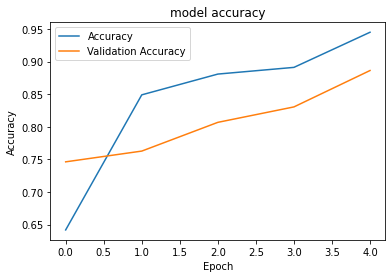

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

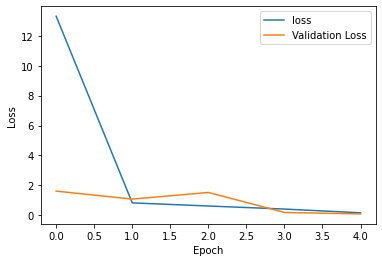

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [34]:
model_final.save("/content/drive/My Drive/Best models/model_m_1.h5")

KeyboardInterrupt: ignored

In [27]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_l_1.h5")

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [5]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_liver/test',
                                                        target_size=(224, 224))

Found 200 images belonging to 4 classes.


In [7]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_cnn.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[ 7 11 18 14]
 [12 11 17 10]
 [14 16  9 11]
 [13 11 10 16]]
Classification Report
              precision    recall  f1-score   support

           0       0.15      0.14      0.15        50
           1       0.22      0.22      0.22        50
           2       0.17      0.18      0.17        50
           3       0.31      0.32      0.32        50

    accuracy                           0.21       200
   macro avg       0.21      0.22      0.21       200
weighted avg       0.21      0.21      0.21       200



In [35]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data_liver/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 35 WrongCount 15
grade0
correct Count 45 WrongCount 5
grade2
correct Count 48 WrongCount 2
grade3
correct Count 43 WrongCount 7


In [18]:
actual

['grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade1',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',
 'grade0',

In [36]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted)) 


Confusion Matrix :
[[45  4  0  1]
 [ 3 35  3  9]
 [ 0  2 48  0]
 [ 0  6  1 43]]
Accuracy Score : 0.855
Report : 
              precision    recall  f1-score   support

      grade0       0.94      0.90      0.92        50
      grade1       0.74      0.70      0.72        50
      grade2       0.92      0.96      0.94        50
      grade3       0.81      0.86      0.83        50

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [31]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

7/7 [==============================] - 101s 14s/step


0.8550000190734863

In [9]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

22/22 [==============================] - 358s 16s/step


1.0

In [11]:
tr_loss,tr_acc=model_final.evaluate(testdata)
tr_acc

4/4 [==============================] - 58s 15s/step


0.8999999761581421

In [6]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

In [7]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

4/4 [==============================] - 51s 13s/step


0.8799999952316284

In [10]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

4/4 [==============================] - 51s 13s/step


0.7900000214576721

In [32]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")